# Unsupervised Machine Learning_Peer-Graded Agreement
     The following code does KMeans and HAC clustering on Wine_quality data. This data has natural cluster by colors. So I compare the results with the color column to check the accuracy. The code also does PCA to reduce the dimentioan of the data to 2D so we can plot KMeans. I also tried elbow plot, the inertia does not facor on the cluster number of 2. From the KMeans clustering , we can see these two clusters are very close, not having clear separation. 

### Load Modules

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Read data and scale its value 

In [2]:
os.chdir('C:\\Study\\IBMMachineLearning\\CoursePythonCode')
data = pd.read_csv('Wine_Quality_Data.csv')
data.shape

(6497, 13)

In [3]:
data.head

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020  

In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [7]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [20]:
scaler = StandardScaler()

features = [x for x in data.columns if x != 'color']

data[features] = scaler.fit_transform(data[features])

data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-3.849639e-16,1.049902e-16,2.187295e-17,3.499672e-17,1.399869e-16,-8.749179e-17,-6.999344e-17,-3.552167e-15,2.729744e-15,-5.424491e-16,9.974065e-16,-3.105959e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-3.227687e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-9.372296e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,2.079990e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,2.079990e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,3.643685e+00


### Clustering the data and compare with the color column which is the natural clusters

####  Try KMeans with cluster number 2, which is the natural cluatering number; compare the results with color column

In [21]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, random_state = 0)

model1 = km.fit(data[features])

In [22]:
model1.inertia_


62487.48633898385

In [39]:
data['predicted_cluster'] = model1.predict(data[features])
data['predicted_cluster'].value_counts()

1    4829
0    1668
Name: predicted_cluster, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['natural_cluster'] = le.fit_transform(data['color'])
data['natural_cluster'].value_counts()



1    4898
0    1599
Name: natural_cluster, dtype: int64

<AxesSubplot:>

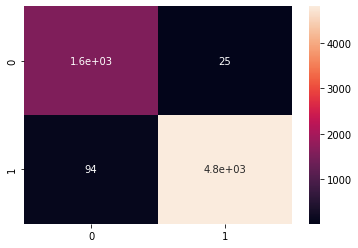

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(data['natural_cluster'], data['predicted_cluster'])
cm
sns.heatmap(cm,annot=True)


#### Use PCA to reduce the dimentions to 2D so we can plot the clusters

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)

data2 = pca.fit_transform(data[features])
data2.shape

(6497, 2)

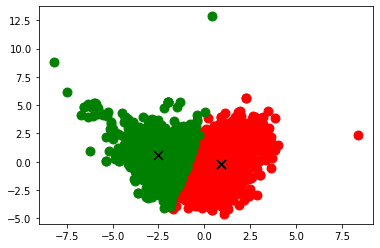

In [85]:
km = KMeans(n_clusters = 2, random_state = 0)
label = km.fit_predict(data2)
label
color = ['red','green']
for i in range(2):
    plt.scatter(data2[label == i,0],data2[label==i,1],color = color[i],marker = 'o',s = 80)
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',s = 80, marker = 'x')
    
plt.show()

#### Plot a elbow or scree plot to find the best cluster number by inertia

<AxesSubplot:xlabel='Cluster Number'>

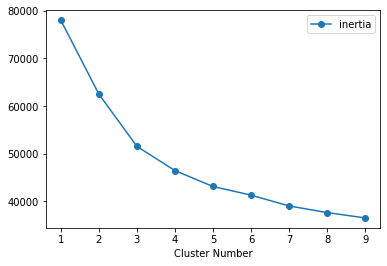

In [56]:
num_clusters = range(1,10)
km_list = []

for i in num_clusters:
    km = KMeans(n_clusters = i, random_state = 24)
    model = km.fit(data[features])
    km_list.append(pd.Series({'Cluster Number': i,
                        'inertia': km.inertia_}))
    
km_list    
km_df = pd.concat(km_list, axis = 1).T.set_index('Cluster Number').plot(marker = 'o', ls = '-')
km_df

#### Use HAC

In [61]:
from sklearn.cluster import AgglomerativeClustering

agg  = AgglomerativeClustering(n_clusters = 2,linkage = 'ward', compute_full_tree=True)

model2 = agg.fit(data[features])


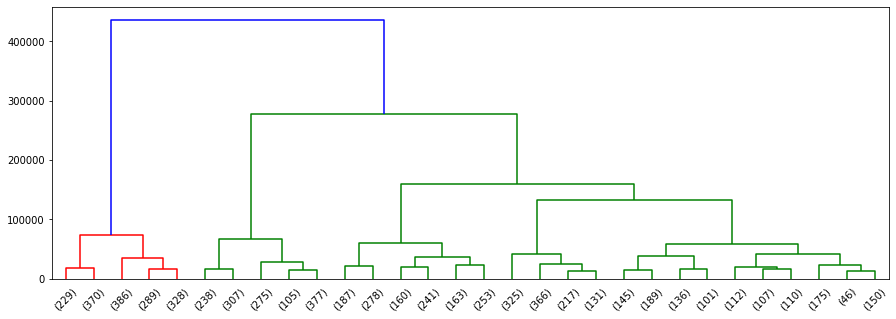

In [64]:

###draw dendrogram plot
from scipy.cluster import hierarchy
 
Z = hierarchy.linkage(agg.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

    
hierarchy.set_link_color_palette(['red', 'green'])
   
den = hierarchy.dendrogram(Z, orientation='top',
                               p=30, truncate_mode='lastp',
                               show_leaf_counts=True, ax=ax,
                              above_threshold_color='blue')

